<a href="https://colab.research.google.com/github/Daniel-de-Jesus/Popula-o-de-rua-de-Belo-Horizonte/blob/main/Segunda_Parte_Mulher_Negra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cabecalho

import pandas as pd
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats as scipy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cria diretamento o dataframe
df_09_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/09_2020.csv')
df_10_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/10_2020.csv')
df_11_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/11_2020.csv')
df_12_2020 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/12_2020.csv')
df_01_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/01_2021.csv')
df_02_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/02_2021.csv')
df_03_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/03_2021.csv')
df_04_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/04_2021.csv')
df_05_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/05_2021.csv')
df_06_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/06_2021.csv')
df_07_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/07_2021.csv')
df_08_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/08_2021.csv')
df_09_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/09_2021.csv')
df_10_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/10_2021.csv')
df_11_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/11_2021.csv')
df_12_2021 = pd.read_csv('/content/drive/MyDrive/Populaçao de rua BH/12_2021.csv')

#criando uma lista de dataframes para iterar
dft= [df_09_2020, df_10_2020, df_11_2020, df_12_2020, df_01_2021, df_02_2021, df_03_2021, df_04_2021, df_05_2021, df_06_2021, df_07_2021, df_08_2021, df_09_2021, df_10_2021, df_11_2021, df_12_2021]

#Juntando todos os DF's
df_mes=pd.DataFrame(pd.concat(dft))
#len(dft_raca_cor)

#Convertendo para date- sem a parte do tempo
df_mes['MES_ANO_REFERENCIA']=pd.to_datetime(df_mes['MES_ANO_REFERENCIA'])

#Estudando o DF
df_mes.info()

#Análise exploratória

##Estudando os dados relacionados à amostra de mulhers negras da população de rua de Belo Horizonte

In [ ]:
pop_mulher= df_mulher['MES_ANO_REFERENCIA'].value_counts()
y=[pop_mulher[0:]]
y

[2021-01-02    2014
 2021-01-04    1030
 2020-01-09    1000
 2020-01-12     997
 2020-01-10     996
 2021-01-01     994
 2020-01-11     973
 2021-01-12     964
 2021-01-11     945
 2021-01-10     913
 2021-01-09     904
 2021-01-08     893
 2021-01-07     886
 2021-01-06     877
 2021-01-05     871
 Name: MES_ANO_REFERENCIA, dtype: int64]

In [ ]:
df_mulher= df_mes[df_mes['SEXO']=='FEMININO']
meses= df_mulher['MES_ANO_REFERENCIA'].unique()
'''sns.scatterplot(x=[i for i in range(len(meses))],
                y=[pop_mulher[0:]]
)'''
len(df_mulher)

15257

In [ ]:
df_mulher_negra= df_mes[(df_mes['SEXO']=='FEMININO') & (df_mes['COR_RACA']=='Preta')]
meses= df_mulher_negra['MES_ANO_REFERENCIA'].unique()
#for mes in meses:
#  print(mes)

#df_mulher_negra_counts#.sort_values()
meses
df_mulher_negra.sort_values(by='MES_ANO_REFERENCIA', inplace= True)
df_mulher_negra_counts= df_mulher_negra['MES_ANO_REFERENCIA'].value_counts()
#df_mulher_negra['MES_ANO_REFERENCIA']
df_mulher_negra_counts#.sort_index(inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


2021-01-02    522
2021-01-04    266
2021-01-01    260
2020-01-09    259
2020-01-12    259
2020-01-10    258
2021-01-12    255
2021-01-11    253
2020-01-11    251
2021-01-10    244
2021-01-09    238
2021-01-08    236
2021-01-07    234
2021-01-06    231
2021-01-05    228
Name: MES_ANO_REFERENCIA, dtype: int64

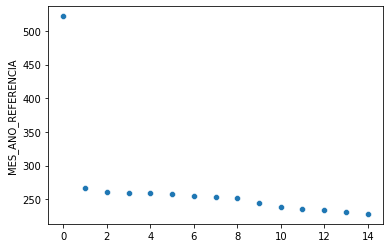

In [ ]:
#Usuarios por mes-rotulado por indice
sns.scatterplot(
    x=[i for i in range(len(df_mulher_negra_counts))],
    y=df_mulher_negra_counts
)

##Vamos separar em dois grupos, um grupo formado apenas pela primeira ocorrência e um grupo de todos os outros dados.


In [ ]:
remuneracao=[]
for i in df_mulher_negra['MES_ANO_REFERENCIA'].unique():
  #print(i,df_mulher_negra[df_mulher_negra['MES_ANO_REFERENCIA']==i]['VAL_REMUNERACAO_MES_PASSADO'].mean())
  remuneracao.append(round(df_mulher_negra[df_mulher_negra['MES_ANO_REFERENCIA']==i]['VAL_REMUNERACAO_MES_PASSADO'].mean(), 2))
Mes=[i for i in range(16)]

In [ ]:
media1= (df_mulher_negra_counts.sort_index()[4]+df_mulher_negra_counts.sort_index()[7])/2
media11= (remuneracao[4]+remuneracao[7])/(2)
grupo1= pd.DataFrame({'Mes':Mes[0],'Numero de usuarios':[df_mulher_negra_counts.sort_index()[0]], 'Remuneracao':remuneracao[0] })
grupo2= pd.DataFrame({'Mes':Mes[1:5],'Numero de usuarios':df_mulher_negra_counts.sort_index()[1:5], 'Remuneracao':remuneracao[1:5]})
grupo3= pd.DataFrame({'Mes':Mes[5],'Numero de usuarios':[media1], 'Remuneracao':[media11]})
grupo4= pd.DataFrame({'Mes':Mes[6],'Numero de usuarios':[(media1+df_mulher_negra_counts.sort_index()[7])/2], 'Remuneracao':[(media11+remuneracao[7])/(2)]})
grupo5= pd.DataFrame({'Mes':Mes[7],'Numero de usuarios':[(df_mulher_negra_counts.sort_index()[6]+df_mulher_negra_counts.sort_index()[8])/2], 'Remuneracao':[(remuneracao[6]+remuneracao[8])/2]})
grupo6= pd.DataFrame({'Mes':Mes[8:],'Numero de usuarios':df_mulher_negra_counts.sort_index()[7:], 'Remuneracao':remuneracao[7:]})
df_mulher_negra_monthcountmean=pd.concat([grupo1, grupo2, grupo3, grupo4, grupo5, grupo6])

df_mulher_negra_monthcountmean.reset_index(drop=True, inplace=True)

In [ ]:
len(df_mulher_negra_monthcountmean)

16

In [ ]:
df_mulher_negra_monthcountmean['Arrecadacao']=df_mulher_negra_monthcountmean['Numero de usuarios']*df_mulher_negra_monthcountmean['Remuneracao']
df_mulher_negra_monthcountmean

,Mes,Numero de usuarios,Remuneracao,Arrecadacao
0,0,259.0,23.89,6187.510
1,1,258.0,23.99,6189.420
2,2,251.0,24.66,6189.660
3,3,259.0,28.97,7503.230
4,4,260.0,26.13,6793.800
5,5,244.0,23.39,5707.160
6,6,236.0,22.02,5196.720
7,7,248.5,21.31,5295.535
8,8,228.0,20.65,4708.200
9,9,231.0,21.04,4860.240


##Gráficos
  Os dados referentes ao mes 03 do ano de 2021, não existem, foi feita uma média dos dados do mes 02 e 04 do mesmo ano. Isso adiciona um problema à análise porque um dos dados utilizados para calcular o dado ausente é um outlier, como se pode observar na figura abaixo.

  Logo, os dados que realmente interessam, ignoram os valores relacionado ao mês 02 e 03 de 2021.

  A olho nu, os dados apresentam uma tendencia constante, o que nos mostra que a população feminina foi invariável durante o período em análise.

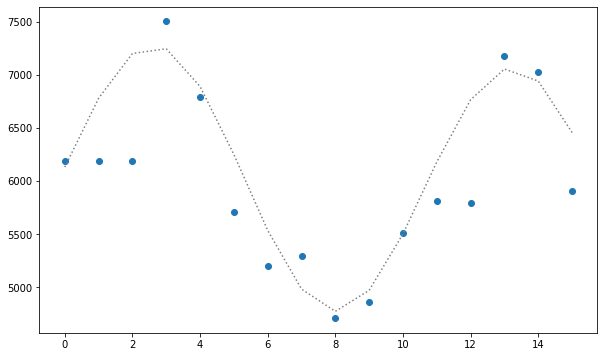

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_mulher_negra_monthcountmean['Mes'], df_mulher_negra_monthcountmean['Arrecadacao'], label='Data')
plt.plot(df_mulher_negra_monthcountmean['Mes'], test_func(df_mulher_negra_monthcountmean['Mes'], 1200, params[1]*1.012, params[2]+200),
         label='Fitted function', ls=':', color='grey')

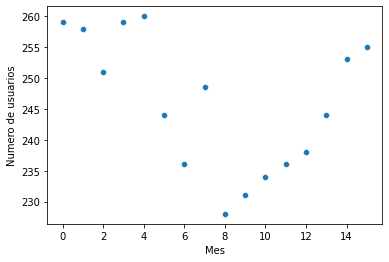

In [ ]:
#finalmente os graficos

sns.scatterplot(data= df_mulher_negra_monthcountmean,
                x= 'Mes',
                y= 'Numero de usuarios'
                )

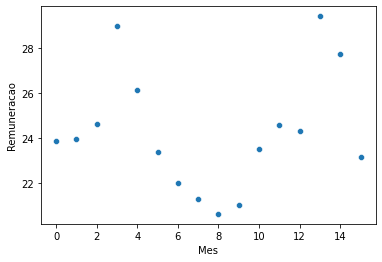

In [ ]:
sns.scatterplot(data= df_mulher_negra_monthcountmean,
                x= 'Mes',
                y= 'Remuneracao'
                )

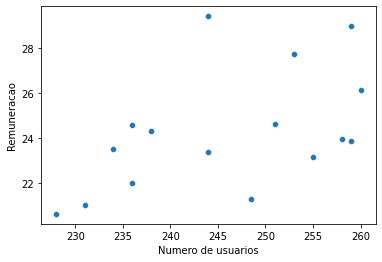

In [ ]:
sns.scatterplot(data= df_mulher_negra_monthcountmean,
                x= 'Numero de usuarios',
                y= 'Remuneracao'
                )

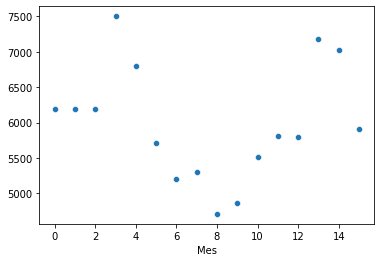

In [ ]:
sns.scatterplot(data= df_mulher_negra_monthcountmean,
                x= 'Mes',
                y= df_mulher_negra_monthcountmean['Remuneracao']*df_mulher_negra_monthcountmean['Numero de usuarios']
                )

In [ ]:
from scipy import optimize

def test_func(x, a, b, c):
    return c+(200-20*x)+(a * np.sin(b * x))

params, params_covariance = optimize.curve_fit(test_func,
                                               df_mulher_negra_monthcountmean['Mes'],
(df_mulher_negra_monthcountmean['Remuneracao']*df_mulher_negra_monthcountmean['Numero de usuarios']),
                                               p0=[100, 0.45, 6000])

print(params)

[1.02295348e+03 5.84700626e-01 5.73058384e+03]


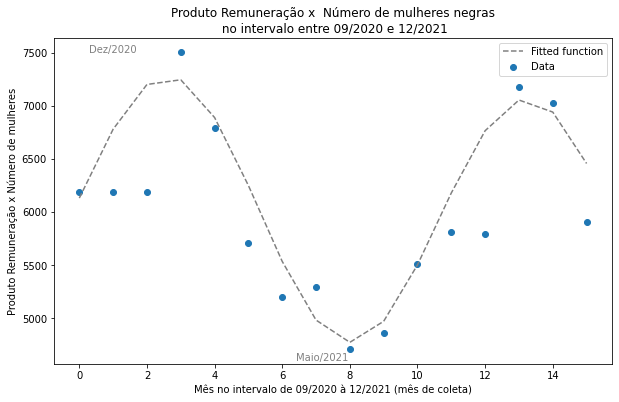

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df_mulher_negra_monthcountmean['Mes'], (df_mulher_negra_monthcountmean['Remuneracao']*df_mulher_negra_monthcountmean['Numero de usuarios']), label='Data')
plt.plot(df_mulher_negra_monthcountmean['Mes'], test_func(df_mulher_negra_monthcountmean['Mes'], 1200, params[1]*1.012, params[2]+200),
         label='Fitted function', ls='--', color='grey')

plt.legend(loc='best')
plt.annotate('Dez/2020',xy=(0.3, 7500), color= 'grey')
plt.annotate('Maio/2021',xy=(6.4, 4600), color= 'grey')
#plt.axhline(y=6200, ls='-.', color='grey')
plt.title("Produto Remuneração x  Número de mulheres negras\n no intervalo entre 09/2020 e 12/2021")
plt.xlabel("Mês no intervalo de 09/2020 à 12/2021 (mês de coleta)")
plt.ylabel('Produto Remuneração x Número de mulheres')
plt.show()

parece que se eliminarmos os pontos dos meses 10/2020, 11/2020, 09/2021 teremos um dado muito próximo de uma função senoidal com amplitude amortecida


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


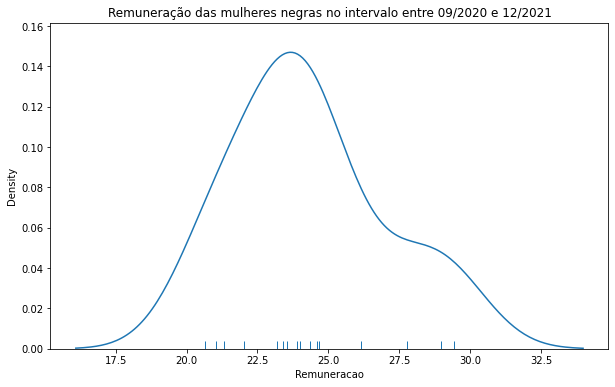

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Remuneração das mulheres negras no intervalo entre 09/2020 e 12/2021")
sns.distplot(df_mulher_negra_monthcountmean['Remuneracao'], rug=True, hist=False )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


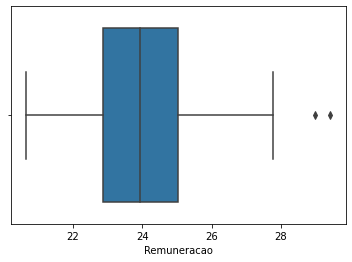

In [ ]:
sns.boxplot(df_mulher_negra_monthcountmean['Remuneracao'] )

#Análise explanatória

##O número de usuários presentes na amostra de mulheres negras da população de rua da cidade de Belo Horizonte é praticamente constante no tempo no intervalo analisado.



'x= [i for i in range(len(df_mulher_negra_monthcountmean))]\nplt.figure(figsize=(10,6))\nplt.title("Número de mulheres em situação de rua no intervalo entre 09/2020 e 12/2021")\nsns.regplot(data= df_mulher_negra_monthcountmean,\n                x= [i for i in range(len(df_mulher_negra_monthcountmean))],\n                y= \'Numero de usuarios\',\n                )\nplt.xlabel(\'Mes\')\nplt.ylabel(\'Número de mulheres\')\ncorr1=scipy.pearsonr(df_mulher_negra_monthcountmean[\'Numero de usuarios\'], x)\nplt.annotate(f\'Correlação: {round(corr1[0], 2)}\', color=\'grey\', xy=(12, 225))'

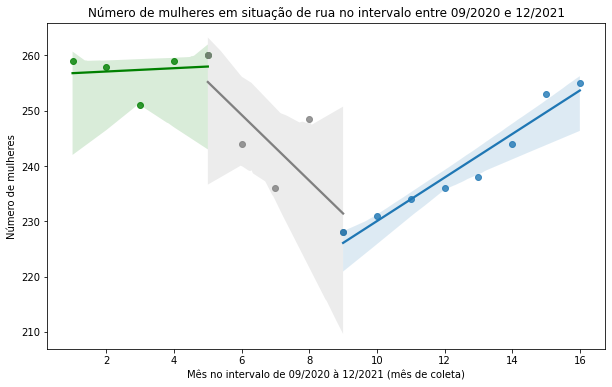

In [ ]:
grupo1= pd.DataFrame({'Mes':[i+1 for i in range(5)],'Número de usuários':[df_mulher_negra_monthcountmean['Numero de usuarios'][i] for i in range(5)]})
grupo2= pd.DataFrame({'Mes':[i+1 for i in range(4, 9)],'Número de usuários':[df_mulher_negra_monthcountmean['Numero de usuarios'][i] for i in range(4, 9)]})
grupo3= pd.DataFrame({'Mes':[i+1 for i in range(8,16)],'Número de usuários':[df_mulher_negra_monthcountmean['Numero de usuarios'][i] for i in range(8,16)],})

plt.figure(figsize=(10,6))
plt.title("Número de mulheres em situação de rua no intervalo entre 09/2020 e 12/2021")

sns.regplot(x='Mes', y='Número de usuários', data= grupo1, color= 'green')
sns.regplot(x='Mes', y='Número de usuários', data= grupo2, color ='grey')
sns.regplot(x='Mes', y='Número de usuários', data= grupo3)

plt.xlabel("Mês no intervalo de 09/2020 à 12/2021 (mês de coleta)")
plt.ylabel('Número de mulheres')
'''x= [i for i in range(len(df_mulher_negra_monthcountmean))]
plt.figure(figsize=(10,6))
plt.title("Número de mulheres em situação de rua no intervalo entre 09/2020 e 12/2021")
sns.regplot(data= df_mulher_negra_monthcountmean,
                x= [i for i in range(len(df_mulher_negra_monthcountmean))],
                y= 'Numero de usuarios',
                )
plt.xlabel('Mes')
plt.ylabel('Número de mulheres')
corr1=scipy.pearsonr(df_mulher_negra_monthcountmean['Numero de usuarios'], x)
plt.annotate(f'Correlação: {round(corr1[0], 2)}', color='grey', xy=(12, 225))'''

##Para a amostra, o número total de usuário não é uma função da remuneração média do grupo.

  Esta remuneração esta no intervalo entre 20 e 30 reais. A população total de mulheres negras segundo os dados é de 4388.0 indivíduos. Isto corresponde à 3.15% da população em situação de rua. A remuneração média da população foi de 26.21 reais, segundo os dados.

 Este resultado é alarmante se colocarmos em perspectiva a linha da pobreza que,
 no ano de 2020 é de cerca de 324.3 reais por mês, a renda média nesse período corresponde à 8.1% deste valor.

 Os eixos de número de mulheres e a remuneração média não estão correlacionados, valor de correlação é de 0,12.

0.5074497380061604


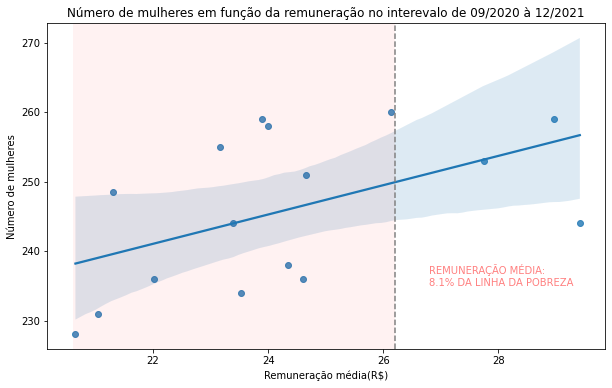

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Número de mulheres em função da remuneração no interevalo de 09/2020 à 12/2021")
sns.regplot(data= df_mulher_negra_monthcountmean,
                x= 'Remuneracao',
                y= 'Numero de usuarios',
            )
plt.axvline(x=26.2, color= 'grey', ls= '--')
plt.annotate('REMUNERAÇÃO MÉDIA:\n8.1% DA LINHA DA POBREZA', xy=(26.8,235), color= 'r', alpha= 0.5)
plt.xlabel('Remuneração média(R$)')
plt.ylabel("Número de mulheres")
corr= scipy.pearsonr(df_mulher_negra_monthcountmean['Remuneracao'],df_mulher_negra_monthcountmean['Numero de usuarios'])
#plt.annotate(f'Correlação: {round(corr[0], 2)}', color='grey', xy=(26.8, 230))
plt.axvspan(20.6, 26.2, facecolor='r', alpha=0.05)
print(corr[0])

In [ ]:
#Populcao mulher negra total e percentual

poptotal= df_mulher_negra_monthcountmean['Numero de usuarios'].sum()
print(f'A população total de mulheres negras segundo os dados é de {poptotal} indivíduos.\nIsto corresponde à {round(((poptotal/(139314))*100),2)}% da população em situação de rua.')
remuneracao_media= df_mulher_negra_monthcountmean['Remuneracao'].sum()/(len(remuneracao))
print(f'A remuneração média da população foi de {round(remuneracao_media, 2)} reais, segundo os dados.\n Este resultado é alarmante se colocarmos em perspectiva a linha da pobreza que,\n no ano de 2020 é de cerca de {10.81*30} reais por mês.')
print(f'A renda média nesse período corresponde à {round((remuneracao_media/(10.81*30))*100,1)}% da linha da pobreza.')

A população total de mulheres negras segundo os dados é de 3934.5 indivíduos.
Isto corresponde à 2.82% da população em situação de rua.
A remuneração média da população foi de 25.93 reais, segundo os dados.
 Este resultado é alarmante se colocarmos em perspectiva a linha da pobreza que,
 no ano de 2020 é de cerca de 324.3 reais por mês.
A renda média nesse período corresponde à 8.0% da linha da pobreza.
